# Perform principal components analysis to cluster the samples based on their SNP genotypes. Plot your samples on the first and second principal components.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# look up doc for PCA and sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load file 
df = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt', sep = "\t")
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# sum rows - horizontally (axis = 1) exclude first four columns 
alt_allele_counts = df.iloc[:,4:].sum(axis = 1)
# total chromosome is number of columns - first 4 times two (diploid)
total_chrom = 2*(len(df.columns)-4)
#alternative allele frequency is all alt allele counts divided by the total chrom
alt_allele_freq = alt_allele_counts.div(total_chrom)
# prints out dataframe - alt_allele_freq
print(alt_allele_freq)

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64


In [4]:
# common variance is dataframe excludes rows that have frequencies outside 0.05-0.95
common_var = df.loc[(alt_allele_freq >= 0.05) & (alt_allele_freq<= 0.95)]
# only take first four
common_var = common_var.iloc[:,4:]

In [5]:
# tranpose common_var for pca input
pca_input = common_var.T

In [6]:
# use standard scaler and fit the transform
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca = PCA(n_components = 10) # run PCA and keep first ten reductions
# transform pca with standardized input
pca_output = pca.fit_transform(pca_input_standardized)
# save output in dataframe
pca_output_df = pd.DataFrame(data = pca_output,
                columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
# print (pca output df)
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546808,-5.393860,-0.502033,-0.211842,1.656168,-0.092890,-4.807230,1.492636
1,-6.133884,-8.631829,2.556163,-3.893065,0.320048,-2.274941,1.241997,5.026123,-0.968376,-2.196793
2,-6.238473,-7.971870,-0.745853,-4.012972,-0.940383,3.878745,0.005080,-1.605546,1.273735,-0.840505
3,-5.051218,-7.008727,2.804059,-4.761344,4.371243,0.146940,-1.109777,-1.154780,1.244051,-0.859799
4,-6.634383,-8.543670,3.072168,-1.595635,-4.376295,0.831295,0.694129,-3.883393,0.912036,0.463077
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.664334,3.298376,-0.207750,-0.732531,-3.298464,-0.089316,-1.504251,-1.232542
2544,-6.295888,-3.116492,-5.555865,3.335023,3.336808,3.699587,-1.952883,-3.741866,-1.874770,-1.454936
2545,-4.096947,-2.827362,-4.179339,3.694621,1.543149,0.585596,-1.634673,-0.544449,3.921816,-0.356111
2546,-6.263462,-2.585080,-4.225126,3.889794,-3.934892,-1.902600,-1.547794,-1.021155,1.289397,2.097955


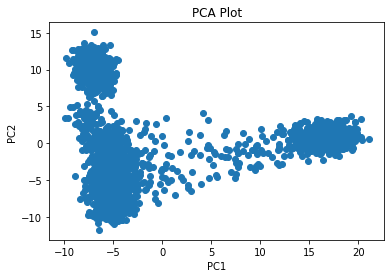

In [7]:
# plot pca output PC1 and PC2
fx, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()